# 1) The problem

Imagine an infinite 2D plane with equally spaced vertical lines (let's call that spacing $b$)

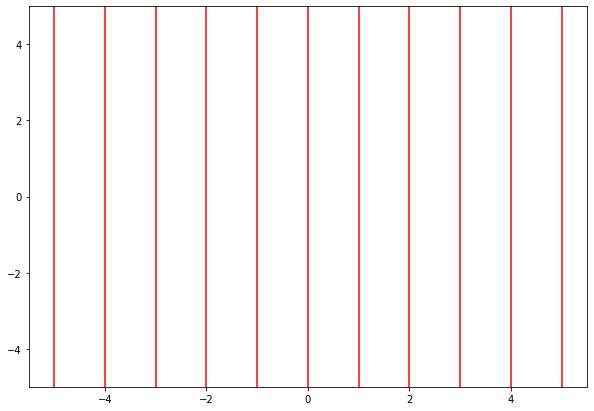

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def draw_fig (b=1):
    fig, ax = plt.subplots(figsize=(10,7))
    ax.set_ylim(-5, 5)
    for xc in np.arange(-5,6,b):
        ax.axvline(x=xc, color = 'red')
    return fig, ax
        
fig, ax = draw_fig()

A needle (let's call its length $a$) is randomly dropped on it.

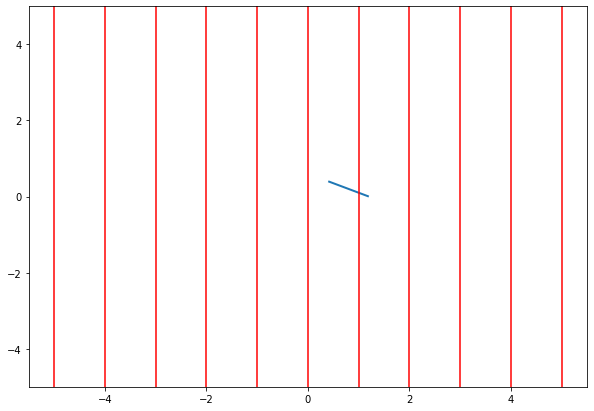

In [2]:
from matplotlib import collections as mc

def drop_needles (fig, ax, coordinates = np.array([[(0.4,0.4), (1.2,0)]])):
    lc = mc.LineCollection(coordinates, linewidths=2)
    ax.add_collection(lc)

fig, ax = draw_fig()
drop_needles(fig, ax)

Question: what is the probability that the needle will fall on a line?

# 2) Some remarks

In the problem, we have 3 random variables: $X$ (x coordinate), $Y$ (y coordinate), $\theta$ (angle of inclination of the needle). I will let the tuple $(X,Y)$ represent the position of the center of the needle on the plane. Furthermore, $\theta$ will be the angle of the needle with respect to the x axis, so that $\theta = 0$ means that the needle "points" to the left and is parallel to the x axis, $\theta = \frac {\pi}{2}$ means that the needle is parallel to the vertical lines and points to the top.  

A uniform distribution is assumed: that is, every possible position (including orientation) of the needle is equally probable (since the problem is in a continuos space, we would say that the "area" on this space of a subset of positions is equiprobable for equal surfaces, no matter where they are placed). <br>
It is obvious that the 3 random variables are independent from one another, which makes the problem easier. Furthermore, we need not care about $Y$, since it is parallel to the vertical lines and hence has no influence whatsover on the crossing of one line. <br>
So what we end up with are simply 2 random variables $X$ and $\theta$. <br>
The problem can then be thought of as a 1D problem.

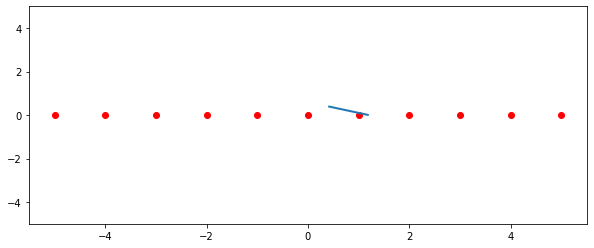

In [3]:
def draw_fig_points (b=1):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.set_ylim(-5, 5)
    ax.scatter(np.arange(-5,6,b), np.zeros(len(np.arange(-5,6,b))), color = 'red')
    return fig, ax
        
fig, ax = draw_fig_points()
drop_needles(fig, ax)

Furthermore, it is easy to notice that considering the whole $x$ axis is wildly redundant: thanks to the uniform distribution, we can reduce the case to $X$ in the range $[0, \frac{b}{2})$. That is because, wherever the needle ends up to be, the position of its center will be between 2 vertical lines. Now, to see if it crosses a line, we need only consider the nearest line (it the other one is crossed, the nearest surely is as well). Because of the uniform distribution, the cases in which that line is the one on the right of the center are equally probable to the other ones. Hence, we can use symmetry and only consider the cases in which the center is on the right of the nearest line.

Yet another simplification: the cases in which the needle is pointed rightwards can be "absorbed" by the ones in which the needle is pointed leftwards (they are equally probable and bring to exactly the same results). Hence, only the range of $\theta \in [0, \pi)$ can be considered. <br>
Furthermore, the cases in which the needle points upwards are functionally equivalent to the ones in which it points downwards (horizontal symmetry). The working range for $\theta$ will then be:
$\theta \in [0, \frac{\pi}{2})$

# 3) Final problem

The final version of the problem is thus a very simple geometrical problem.

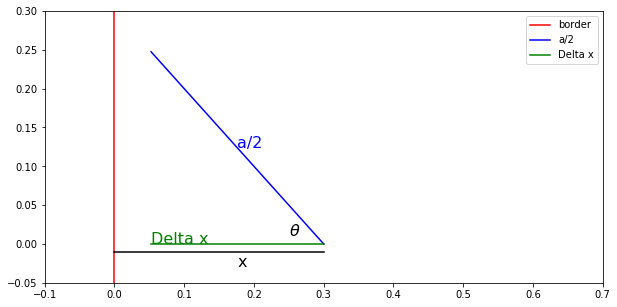

In [4]:
def draw (b=1, a=0.7, theta=np.pi/4, my_x=0.3):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.set_ylim(-0.05, 0.3)
    ax.set_xlim(-0.1, a)
    ax.axvline(x=0, color = 'red')
    ax.plot([my_x,my_x-np.cos(theta)*a/2], [0, np.sin(theta)*a/2], color = 'blue')
    ax.text(my_x-np.cos(theta)*a/4, np.sin(theta)*a/4, 'a/2', color='blue', fontsize=16)
    ax.plot([my_x,my_x-np.cos(theta)*a/2], [0, 0], color = 'green')
    ax.text(my_x-np.cos(theta)*a/2, 0, 'Delta x', color='green', fontsize=16)
    ax.plot([my_x,0], [-0.01, -0.01], color = 'black')
    ax.text(my_x-np.cos(theta)*a/4, -0.03, 'x', color='black', fontsize=16)
    ax.text(my_x-0.05, 0.01, '$\\theta$', fontsize=16)

    ax.legend(['border', 'a/2', 'Delta x'])
    return fig, ax
        
fig, ax = draw()

From the drawing, one can deduce that $Delta_x = \frac{a}{2}\cos(\theta)$ </br>
The needle will cross the vertical line if $Delta_x > x$. </br>

We will have a probability density function (pdf) $\operatorname{f_{x,\theta}}(x,\theta)$ for the 2 parameters, and $P(cross|\theta,x) = \mathbb{1}(\frac{a}{2}\cos{\theta} > x) $ (either $1$ or $0$ depending on position and angle, since those 2 parameters determine the position).<br> <br>
$P(cross) = \int_{x \in [0,\frac{b}{2}), \theta \in [0, \frac{\pi}{2})}P(cross|\theta,x) dP(x,\theta)
 = \int_{x \in [0,\frac{b}{2}), \theta \in [0, \frac{\pi}{2})}P(cross|\theta,x) \operatorname{f_{x,\theta}}(x,\theta)d(x,\theta) = \int_{x \in [0,\frac{b}{2}), \theta \in [0, \frac{\pi}{2})} \mathbb{1}(\frac{a}{2}\cos{\theta} > x)\operatorname{f_{x,\theta}}(x,\theta)d(x,\theta)$
 
Since X, $\theta$ are independent, I can write:

$P(cross) = \int_{x=0}^{\frac{b}{2}} \int_{\theta=0}^{\frac{\pi}{2}}\mathbb{1}(\frac{a}{2}\cos{\theta} > x) \operatorname{f_{x}}(x) \operatorname{f_{\theta}}(\theta) dx d\theta
= \int_{\theta=0}^{\frac{\pi}{2}}\operatorname{f_{\theta}}(\theta) \int_{x=0}^{\frac{b}{2}} \mathbb{1}(\frac{a}{2}\cos{\theta} > x)\operatorname{f_{x}}(x)  d\theta dx = \\ = \int_{\theta=0}^{\frac{\pi}{2}}\operatorname{f_{\theta}}(\theta)d\theta \int_{x=0}^{\frac{b}{2}} \mathbb{1}(\frac{a}{2}\cos{\theta} > x)\operatorname{f_{x}}(x)dx$

The last steps can be seen as fixing $\theta \in [0, \frac{\pi}{2})$, integrating the probability over $x$ for $\theta$ fix, and then integrating over all possible values for $\theta$.

<br>
Now, since $x$ is uniformly distributed, $\operatorname{f_{x}}(x)$ is constant with as a value the inverse of the length of the possibilities for x (so that it is constant and it integrates to $1$):

$\int_{x=0}^{\frac{b}{2}} \mathbb{1}(\frac{a}{2}\cos{\theta} > x)\operatorname{f_{x}}(x)dx
 = \int_{x=0}^{\frac{b}{2}}\mathbb{1}(\frac{a}{2}\cos{\theta} > x) \frac{1}{\frac{b}{2}-0} dx 
 = \frac{2}{b} \int_{x=0}^{\frac{b}{2}}\mathbb{1}(\frac{a}{2}\cos{\theta} > x)dx = $

$cos{x}$ is monotonic decreasing; hence, we can say that the indicator function $\mathbb{1}(\frac{a}{2}\cos{\theta} > x)$ will be $1$ up to $x = \frac{a}{2}\cos{\theta}$ and then $0$.

$ = \frac{2}{b} \int_{x=0}^{\min(\frac{a}{2}\cos{\theta}, \frac{b}{2})}dx
 = \frac{2}{b} \min(\frac{a}{2}\cos{\theta}, \frac{b}{2})
 = \frac{\min(a\cos{\theta}, b)}{b}$

Here I need a simplification of the problem: if I limit the value of $a<=b$, then

$ = \frac{a}{b}\cos{\theta}$

<br>
By letting $\theta$ change, I can now integrate the starting expression:

$P(cross) =
 \int_{\theta=0}^{\frac{\pi}{2}}\operatorname{f_{\theta}}(\theta) \int_{x=0}^{\frac{b}{2}} \operatorname{f_{x}}(x)  d\theta dx = \int_{\theta=0}^{\frac{\pi}{2}}\operatorname{f_\theta}(\theta)\frac{a}{b}\cos{\theta}d\theta = $
<br>

Here I use again the uniform distribution:

$P(cross) = \int_{\theta=0}^{\frac{\pi}{2}}\frac{1}{\frac{\pi}{2}}\frac{a}{b}\cos{\theta}d\theta =  \frac{a}{b}\frac{2}{\pi} \sin{\theta}\Big|_{0}^{\frac{\pi}{2}}
 = \frac{2a}{b\pi}(1-0)
 = \frac{2a}{b\pi} $

And this is the final solution.